In [0]:
import pandas as pd
import nltk
import re
import numpy as np
from nltk.tokenize import RegexpTokenizer
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

result = pd.read_csv('https://raw.githubusercontent.com/adautofbn/ri_lab_01/master/output/results.csv')

## 1. Reproduza a tabela 4.1 do livro texto calculando as estatísticas para sua coleção.



In [0]:
total_documents = result.text.count()
all_words = []
total_word_occurrences = 0

tknz = RegexpTokenizer(r'(\b[A-Za-z][a-z]{2,27}\b)')

for text in result.text:
   words = [word for word in tknz.tokenize(text.lower())
           if len(word) >= 3 and not bool(re.search(r'\d', word))]
   all_words.extend(words)

total_word_occurrences = len(all_words)

In [0]:
word_frequency = {}
word_frequency = Counter(all_words)
words_more_1000 = 0
words_once = 0
vocabulary_size = 0

words_once = len([freq for freq in word_frequency.values() if freq == 1])
words_more_1000 = len([freq for freq in word_frequency.values() if freq > 1000])
vocabulary_size = len(word_frequency)

In [4]:
stats_table = pd.DataFrame(data = {' ':['Total documents',
                                              'Total word occurrences',
                                              'Vocabulary size', 
                                              'Words occurring > 1000 times',
                                              'Words occurring once '],
                                  '':[total_documents,
                                             total_word_occurrences,
                                             vocabulary_size,
                                             words_more_1000,
                                             words_once]})
stats_table.index += 1
stats_table.style.hide_index()

,
Total documents,75
Total word occurrences,14421
Vocabulary size,4067
Words occurring > 1000 times,0
Words occurring once,2260


## 2. Reproduza a tabela 4.2 do livro considerando as top-50 palavras mais frequentes de sua coleção

In [5]:
top_words = word_frequency.most_common(50)

top_50_table = pd.DataFrame(columns = ['Word', 'Frequency', 'r', 'Pr(%)', 'r.Pr'])

top_50_table['Word'] = [word[0] for word in top_words]
top_50_table['Frequency'] = [word[1] for word in top_words]
top_50_table['r'] = [rank+1 for rank in range(0, len(top_words))]
top_50_table['Pr(%)'] = [round((word[1] / total_word_occurrences)*100, 2) for word in top_words]
top_50_table['r.Pr'] = round((top_50_table['Pr(%)']/100)*top_50_table['r'], 3)

top_50_table.index += 1
top_50_table

,Word,Frequency,r,Pr(%),r.Pr
1,que,677,1,4.69,0.047
2,para,288,2,2.00,0.040
3,com,236,3,1.64,0.049
4,uma,216,4,1.50,0.060
5,por,123,5,0.85,0.042
6,dos,121,6,0.84,0.050
7,presidente,113,7,0.78,0.055
8,foi,113,8,0.78,0.062
9,como,110,9,0.76,0.068
10,brasil,94,10,0.65,0.065


## 3. Plote curvas de rank-frequência (usando escala logarítmica) para palavras e bigramas na coleção que você coletou na atividade anterior. Quais os melhores valores do parâmetro c para cada curva

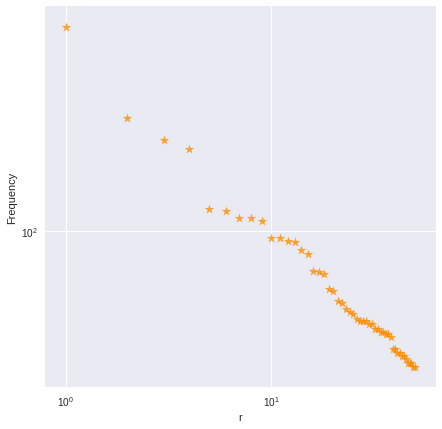

In [6]:
f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", top_50_table, ax=ax, marker="*", scatter_kws={"s": 100}, fit_reg = False, color = '#FF8C00')

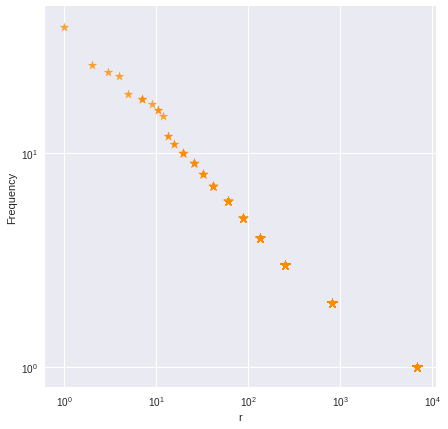

In [7]:
bigrams = []
bigrams = nltk.bigrams(all_words)
bigrams_freq = nltk.FreqDist(bigrams)
bigrams_table = pd.DataFrame(bigrams_freq.most_common(), columns=['word', 'Frequency'])
bigrams_table['r'] = bigrams_table['Frequency'].rank(ascending=False)

f, ax = plt.subplots(figsize=(7, 7))
ax.set(xscale="log", yscale="log")
sns.regplot("r", "Frequency", bigrams_table, ax=ax, marker="*", scatter_kws={"s": 100}, fit_reg = False, color = '#FF8C00')

## 4. Reproduza a tabela 4.5 do livro texto considerando a sua coleção

In [8]:
prop_table = pd.DataFrame()
prop_table['Number of Occurrences (n)'] = word_frequency.values() 
prop_table = prop_table.groupby(['Number of Occurrences (n)'])['Number of Occurrences (n)'].size().reset_index(name='Actual Number of Words')
prop_table['Predicted Proportion (1/n(n+1))'] = round(1 / (prop_table['Number of Occurrences (n)']*(prop_table['Number of Occurrences (n)'] + 1)), 3)
prop_table['Actual Proportion'] = round(prop_table['Actual Number of Words'] / len(word_frequency), 3)

prop_table = prop_table[['Number of Occurrences (n)', 'Predicted Proportion (1/n(n+1))', 'Actual Proportion', 'Actual Number of Words']]
prop_table.index += 1
prop_table.head(10)

,Number of Occurrences (n),Predicted Proportion (1/n(n+1)),Actual Proportion,Actual Number of Words
1,1,0.500,0.556,2260
2,2,0.167,0.181,735
3,3,0.083,0.072,291
4,4,0.050,0.045,185
5,5,0.033,0.033,135
6,6,0.024,0.020,82
7,7,0.018,0.017,68
8,8,0.014,0.011,44
9,9,0.011,0.008,33
10,10,0.009,0.009,36
